In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penguin-size-dataset/penguins_size.csv


In [3]:
df= pd.read_csv('/kaggle/input/penguin-size-dataset/penguins_size.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [9]:
df.dropna(subset=['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'], inplace=True, how='all')

In [10]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [11]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,342,342,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,151,167,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


<Axes: title={'center': 'Culmen Depth Distribution'}, xlabel='Culmen Depth', ylabel='frequency'>

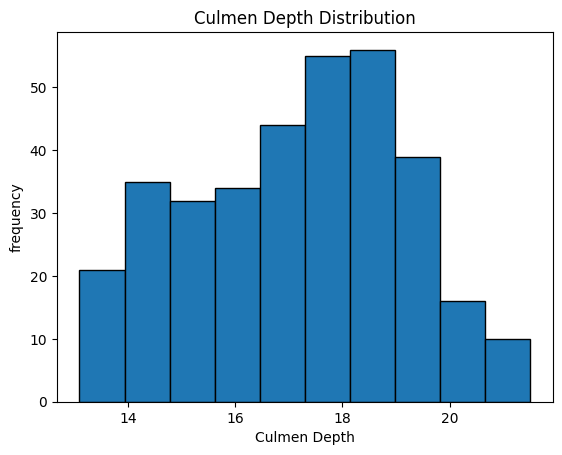

In [21]:
df.culmen_depth_mm.plot(kind='hist',grid=False, title='Culmen Depth Distribution', xlabel='Culmen Depth',ylabel='frequency',edgecolor='black')

<Axes: title={'center': 'Culmen Length Box-plot'}>

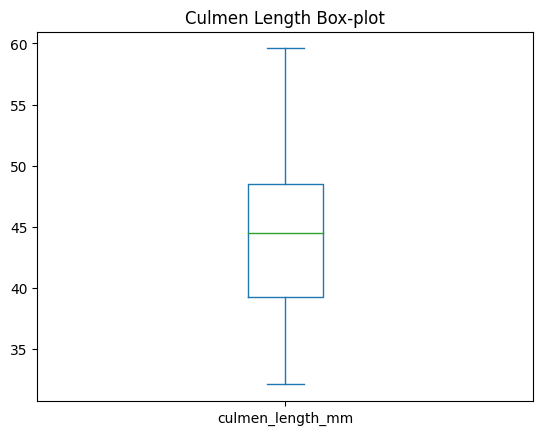

In [27]:
df.culmen_length_mm.plot(kind='box', title='Culmen Length Box-plot')

<Axes: title={'center': 'Culmen Length Distribution'}, xlabel='Culmen Length', ylabel='frequency'>

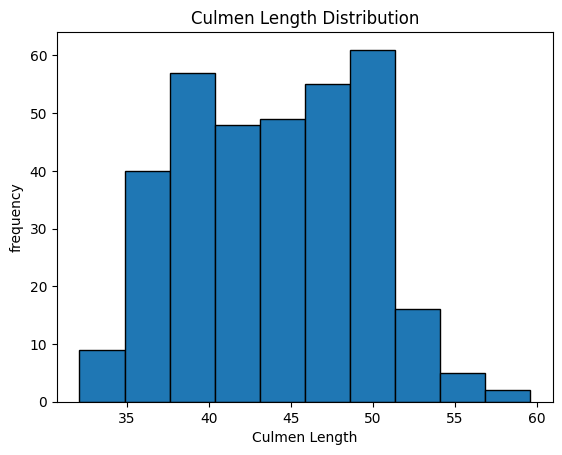

In [22]:
df.culmen_length_mm.plot(kind='hist',grid=False, title='Culmen Length Distribution', xlabel='Culmen Length',ylabel='frequency',edgecolor='black')

<Axes: title={'center': 'Culmen Depth Box-Plot'}>

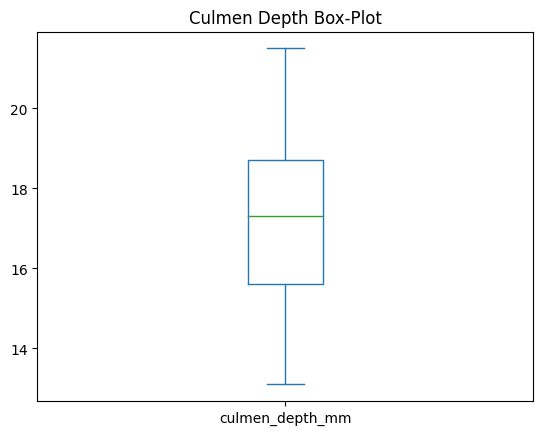

In [28]:
df.culmen_depth_mm.plot(kind='box', title='Culmen Depth Box-Plot')

<Axes: title={'center': 'Flipper Length Distribution'}, xlabel='Flipper Length', ylabel='frequency'>

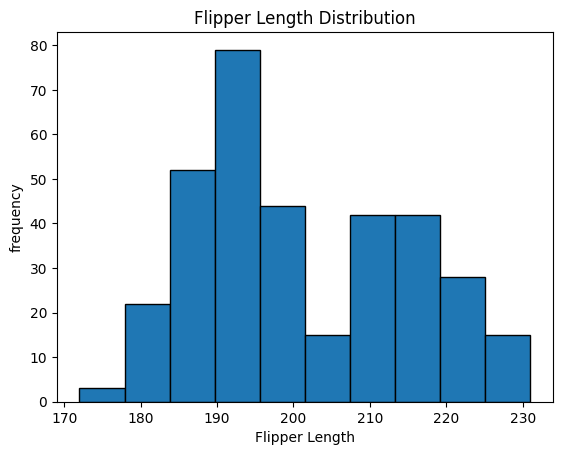

In [29]:
df.flipper_length_mm.plot(kind='hist',grid=False, title='Flipper Length Distribution', xlabel='Flipper Length',ylabel='frequency',edgecolor='black')

<Axes: title={'center': 'Body Mass Distribution'}, xlabel='Body Mass', ylabel='frequency'>

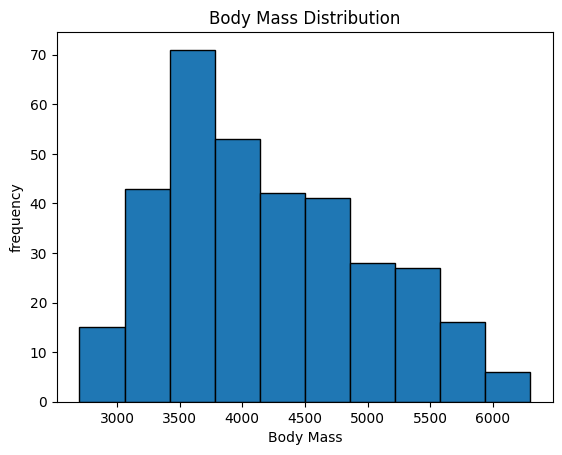

In [30]:
df.body_mass_g.plot(kind='hist',grid=False, title='Body Mass Distribution', xlabel='Body Mass',ylabel='frequency',edgecolor='black')

In [31]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

<Axes: title={'center': 'Culmen Depth vs Culmen Length'}, xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

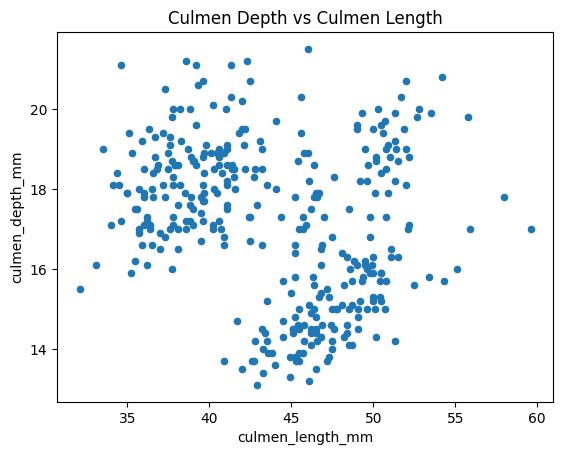

In [33]:
df.plot(x='culmen_length_mm',y='culmen_depth_mm',kind='scatter', title='Culmen Depth vs Culmen Length')

Text(0.5, 1.0, 'Correlations')

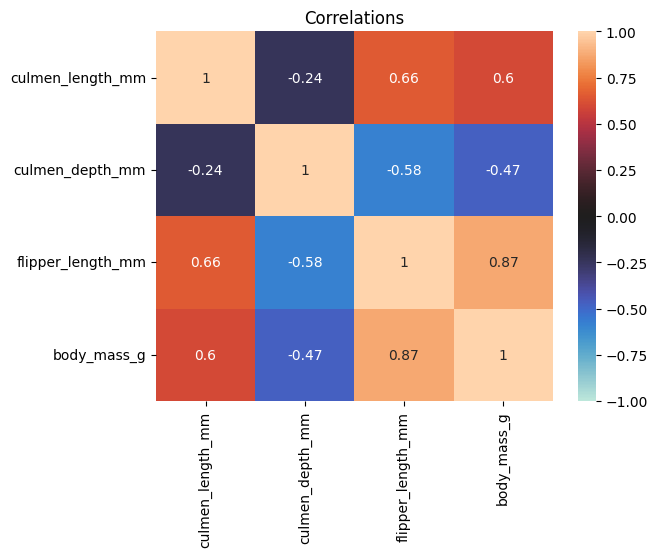

In [45]:
import matplotlib.pyplot as plt
numerical = df.select_dtypes(exclude='object')
sns.heatmap(numerical.corr(),annot=True,vmin=-1,vmax=1,center=0)
plt.title('Correlations')

<Axes: title={'center': 'Average Body mass(g) of different species'}, xlabel='species', ylabel='Body Mass(g)'>

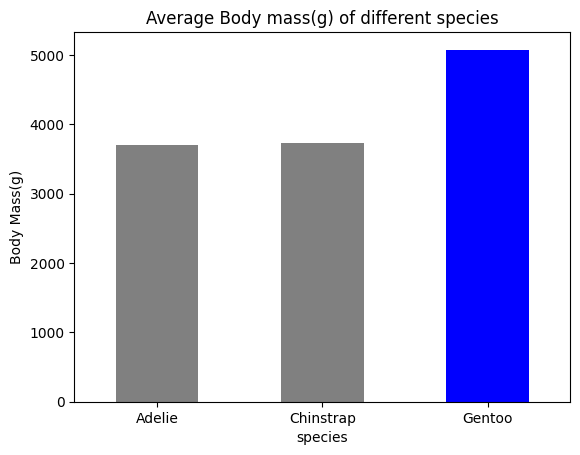

In [87]:
df.groupby('species')['body_mass_g'].mean().plot.bar(ylabel='Body Mass(g)', color=['grey','grey','blue'], rot=360, title='Average Body mass(g) of different species')

<Axes: title={'center': 'Average Culmen Length and Depth(mm) of different species'}, xlabel='species', ylabel='size(mm)'>

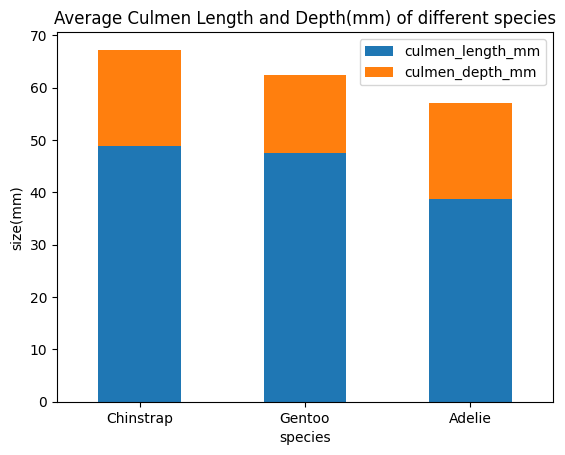

In [77]:
df.groupby('species')[['culmen_length_mm','culmen_depth_mm']].mean().sort_values('culmen_length_mm',ascending=False).plot.bar(ylabel='size(mm)',stacked=True, rot=360, title='Average Culmen Length and Depth(mm) of different species')

Chinstrap specie has the highest average culmen length; the above plot is sorted by culmen length.

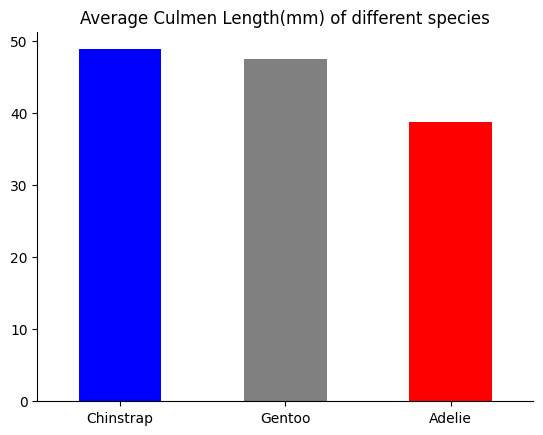

In [90]:
ax= df.groupby('species')['culmen_length_mm'].mean().sort_values(ascending=False).plot.bar(stacked=True, rot=360, title='Average Culmen Length(mm) of different species',color=['blue','grey','red'],xlabel='')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<Axes: title={'center': 'Average Culmen Length and Depth(mm) of different species'}, xlabel='species', ylabel='size(mm)'>

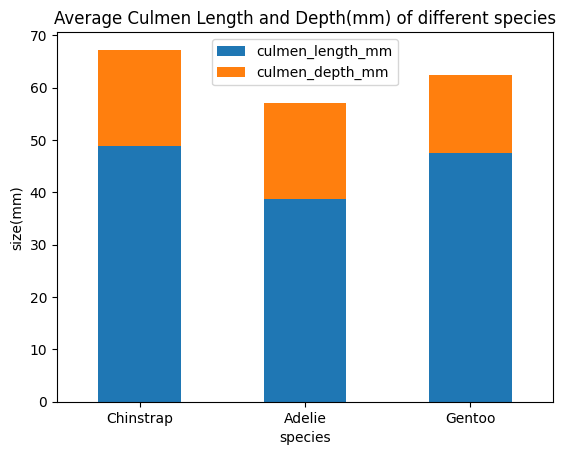

In [78]:
df.groupby('species')[['culmen_length_mm','culmen_depth_mm']].mean().sort_values('culmen_depth_mm',ascending=False).plot.bar(ylabel='size(mm)',stacked=True, rot=360, title='Average Culmen Length and Depth(mm) of different species')

The above plot is sorted by culmen depth. Chinstrap has the highest average culmen depth.

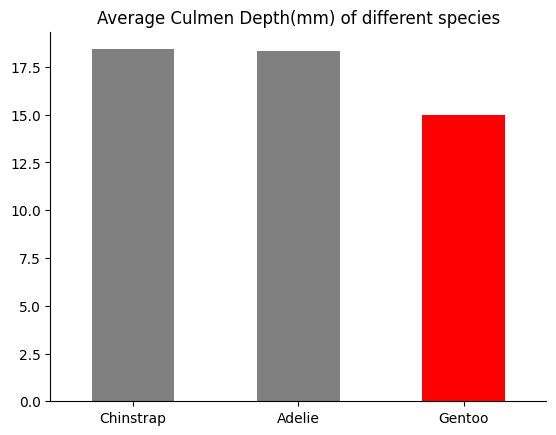

In [91]:
ax= df.groupby('species')['culmen_depth_mm'].mean().sort_values(ascending=False).plot.bar(stacked=True, rot=360, title='Average Culmen Depth(mm) of different species',color=['grey','grey','red'],xlabel='')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<Axes: title={'center': 'Average Body mass(g) of different islands'}, xlabel='island', ylabel='Body Mass(g)'>

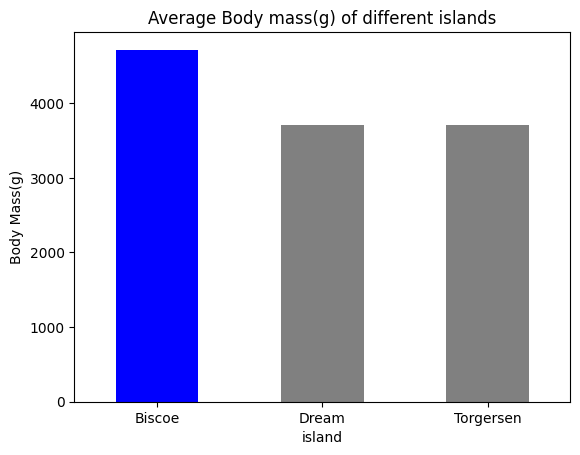

In [86]:
df.groupby('island')['body_mass_g'].mean().plot.bar(ylabel='Body Mass(g)', color=['blue','grey','grey'], rot=360, title='Average Body mass(g) of different islands')

<Axes: title={'center': 'Average Body Mass(g) per Specie for each Island'}, xlabel='island', ylabel='Body Mass(g)'>

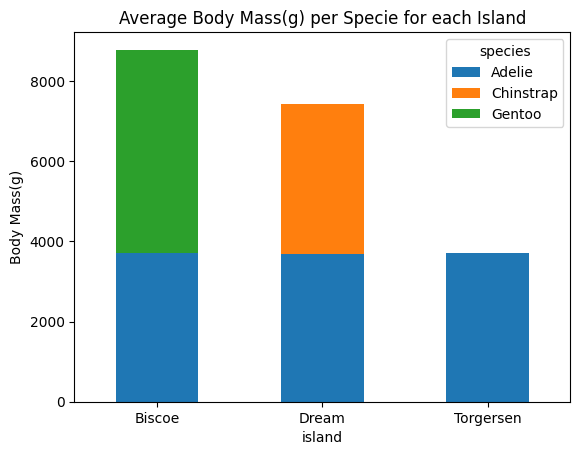

In [61]:
df.groupby(['island','species'])['body_mass_g'].mean().unstack().plot(kind='bar',stacked=True, ylabel='Body Mass(g)',rot=360,title='Average Body Mass(g) per Specie for each Island')

In [94]:
df.drop(df.loc[df.sex=='.'].index,inplace=True)

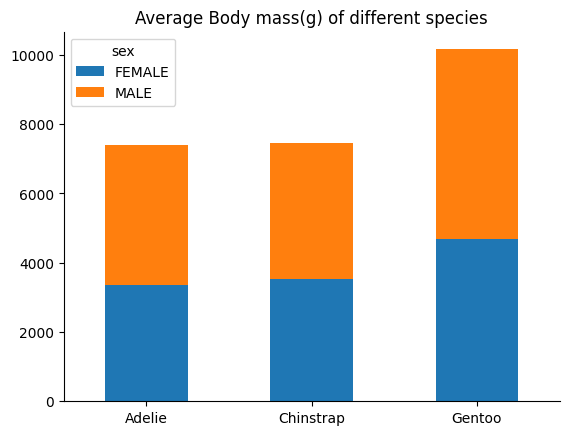

In [101]:
ax=df.groupby(['species','sex'])['body_mass_g'].mean().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True, title='Average Body mass(g) of different species', rot=360, xlabel='')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

There isnt discernible difference between the average body mass of both sexes. 
Gentoo has the highest average body-mass of all species with genders.

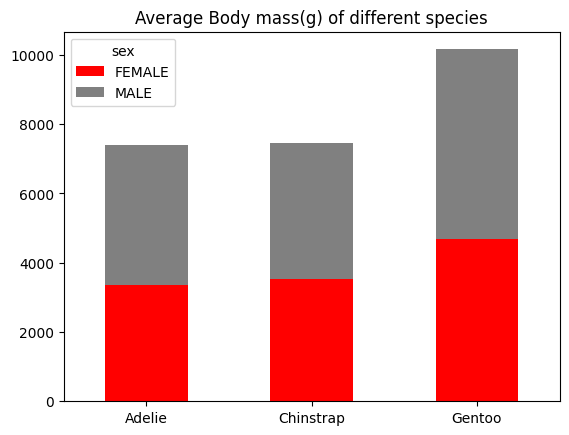

In [106]:
ax=df.groupby(['species','sex'])['body_mass_g'].mean().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True, title='Average Body mass(g) of different species', rot=360, xlabel='',color=['red','grey'])


In [115]:
df.groupby(['species','island'])['body_mass_g'].mean()

species    island   
Adelie     Biscoe       3709.659091
           Dream        3688.392857
           Torgersen    3706.372549
Chinstrap  Dream        3733.088235
Gentoo     Biscoe       5077.663934
Name: body_mass_g, dtype: float64

Text(0.5, 1.0, 'Sex seems to influence culmen length and body mass')

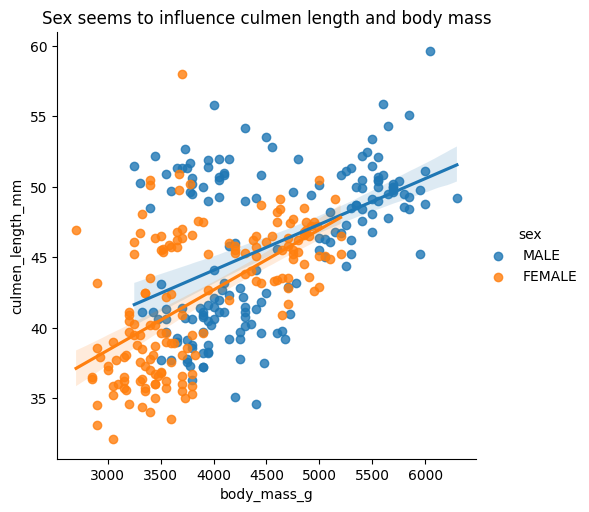

In [127]:
sns.lmplot(data=df,x='body_mass_g',y='culmen_length_mm',hue='sex')
plt.title('Sex seems to influence culmen length and body mass')

In [117]:
df.loc[df.sex=='MALE',['culmen_length_mm','body_mass_g']].corr()

,culmen_length_mm,body_mass_g
culmen_length_mm,1.000000,0.476761
body_mass_g,0.476761,1.000000


In [118]:
df.loc[df.sex=='FEMALE',['culmen_length_mm','body_mass_g']].corr()

,culmen_length_mm,body_mass_g
culmen_length_mm,1.000000,0.581295
body_mass_g,0.581295,1.000000


In [125]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
fstat, pval = f_oneway(df.loc[df.sex=='MALE','body_mass_g'],df.loc[df.sex=='FEMALE','body_mass_g'])
if pval<0.05:
    print('Sex has an effect on body mass')
else:
    print('Sex doesn"t have an effect on body mass')

Sex has an effect on body mass


In [126]:
fstat, pval = f_oneway(df.loc[df.sex=='MALE','culmen_length_mm'],df.loc[df.sex=='FEMALE','culmen_length_mm'])
if pval<0.05:
    print('Sex has an effect on Culmen length')
else:
    print('Sex doesn"t have an effect on Culmen length')

Sex has an effect on Culmen length


In [128]:
fstat, pval = f_oneway(df.loc[df.sex=='MALE','flipper_length_mm'],df.loc[df.sex=='FEMALE','flipper_length_mm'])
if pval<0.05:
    print('Sex has an effect on Flipper length')
else:
    print('Sex doesn"t have an effect on Flipper length')

Sex has an effect on Flipper length


In [129]:
fstat, pval = f_oneway(df.loc[df.sex=='MALE','culmen_depth_mm'],df.loc[df.sex=='FEMALE','culmen_depth_mm'])
if pval<0.05:
    print('Sex has an effect on Culmen depth')
else:
    print('Sex doesn"t have an effect on Culmen depth')

Sex has an effect on Culmen depth
